<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AK_01_Data_Exploration" data-toc-modified-id="AK_01_Data_Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AK_01_Data_Exploration</a></span><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#WIP---improvements" data-toc-modified-id="WIP---improvements-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>WIP - improvements</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Suggested-next-steps" data-toc-modified-id="Suggested-next-steps-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Suggested next steps</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-import" data-toc-modified-id="Library-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Library import</a></span></li></ul></li><li><span><a href="#Parameter-definition" data-toc-modified-id="Parameter-definition-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameter definition</a></span></li><li><span><a href="#Data-import" data-toc-modified-id="Data-import-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data import</a></span><ul class="toc-item"><li><span><a href="#Farley2015-Science-Otx-a-Data" data-toc-modified-id="Farley2015-Science-Otx-a-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Farley2015 Science <em>Otx-a</em> Data</a></span></li><li><span><a href="#Random-sequence-data" data-toc-modified-id="Random-sequence-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random sequence data</a></span></li></ul></li><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# AK_01_Data_Exploration

## Purpose
This notebook can be used to inspect and preprocess the data that will be used to train EUGENE models

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2
%config Completer.use_jedi = False

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

# Data import

## Farley2015 Science *Otx-a* Data

In [2]:
otx_data = pd.read_excel('../data/2015_Farley_S/aac6948_Tables_S1_and_S2.xlsx', header=0)
otx_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/2015_Farley_S/aac6948_Tables_S1_and_S2.xlsx'

## Random sequence data

In [46]:
import random
def random_dna_sequence(length):
    return ''.join(random.choice('ACTG') for _ in range(length))
random_dna_sequence(69)

'ATATTTTGTTATTGGAGCTGTCGGCACTTCGTAACAACATTGAGTTTGGCCTCCATTTATCGCATTTTC'

In [51]:
n_seq = 1000
seq_len = 69
random_data = np.array([random_dna_sequence(seq_len) for i in range(n_seq)])
random_rpm = np.array([np.random.random() for i in range(n_seq)])

# Data processing

Check for sequences of variable length

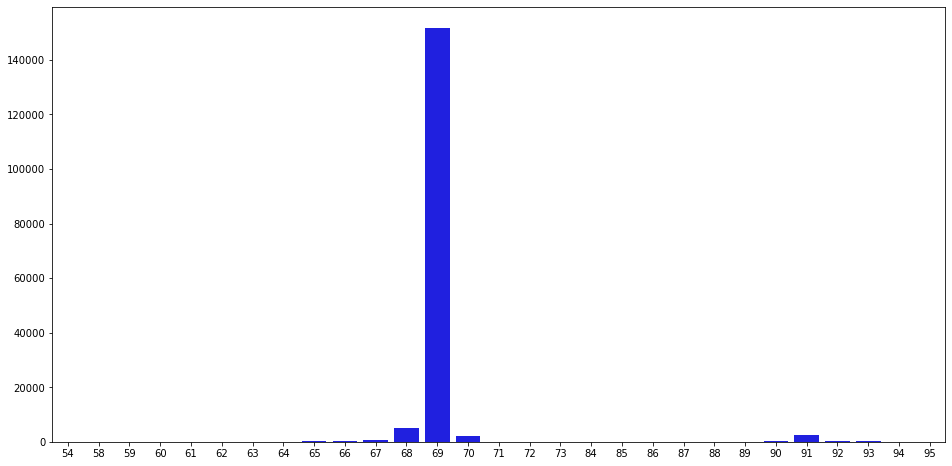

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
plt_data = otx_data['Enhancer'].apply(len).value_counts().astype(object) 
plt_data = plt_data[plt_data >= 10]
sns.barplot(x=plt_data.index, y=plt_data.values, color='blue', ax=ax);

Looks like there are many different sequence lengths

<AxesSubplot:xlabel='Biological Replicate 1 (RPM)', ylabel='Biological Replicate 2 (RPM)'>

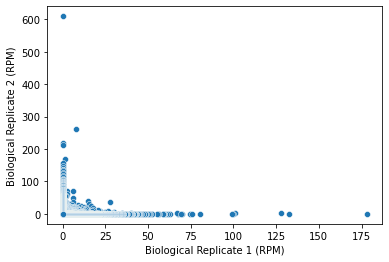

In [11]:
sns.scatterplot(data=otx_data, x='Biological Replicate 1 (RPM)', y='Biological Replicate 2 (RPM)')

In [10]:
np.corrcoef(otx_data['Biological Replicate 1 (RPM)'], otx_data['Biological Replicate 2 (RPM)'])

array([[ 1.        , -0.08841874],
       [-0.08841874,  1.        ]])

# References
We report here relevant references:
1. Farley, E. K. et al. Suboptimization of developmental enhancers. Science 350, 325–328 (2015)
2. author2, article2, journal2, year2, url2